# Homework: Preprocessing


In [20]:
#imports
import pandas as pd
import numpy as np
import re
from gensim.parsing.preprocessing import STOPWORDS, strip_tags, strip_numeric, strip_punctuation, strip_multiple_whitespaces, remove_stopwords, strip_short, stem_text
import pickle
import en_core_web_sm
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Part A

Read https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json either from the url or from a file on Google Drive. Call it df.

In [ ]:
df = pd.read_json("https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json")
df.head()

,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


Print the head of df. What kind of data does it contain? How many entries does it have? Which categories can be found in the column target_names? What is their distribution (e.g. with value_counts())? Print the first content value. Does it match the target name? Which business question can this dataset address?

In [ ]:
#kind of data of df
df.dtypes

content         object
target           int64
target_names    object
dtype: object

In [ ]:
print(f"The df contains newsgroups posts on {len(df.target_names.unique())} different topics")

The df contains newsgroups posts on 20 different topics


In [ ]:
print(f"Number of entries: {df.shape[0]}")

Number of entries: 11314


In [ ]:
#Categories in column target_names
df.target_names.unique()

array(['rec.autos', 'comp.sys.mac.hardware', 'comp.graphics', 'sci.space',
       'talk.politics.guns', 'sci.med', 'comp.sys.ibm.pc.hardware',
       'comp.os.ms-windows.misc', 'rec.motorcycles', 'talk.religion.misc',
       'misc.forsale', 'alt.atheism', 'sci.electronics', 'comp.windows.x',
       'rec.sport.hockey', 'rec.sport.baseball', 'soc.religion.christian',
       'talk.politics.mideast', 'talk.politics.misc', 'sci.crypt'],
      dtype=object)

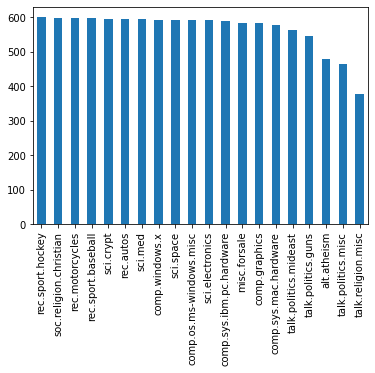

In [ ]:
#Distribution of target_names
df.target_names.value_counts().plot(kind="bar");

*The classes are almost uniformly distributed.*

In [ ]:
#Print the first content value. Does it match the target name?
print(df["content"][0])
print("Target name:",df["target_names"][0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





Target name: rec.autos


---
***Which business question can this dataset address?***
- Can be used to classify posts to the corresponding topic/thread based on the content of the posting
- Identify posts which have been posted to the wrong thread?

## Part B

Remove the lines beginning with any of the following: 
- ‘From:’, ‘Article-I.D.:’, ‘Organization:’, ‘Lines:’, ‘NNTP-Posting-Host:’, ‘Distribution:’, ‘Reply-T o:’, ‘X- Newsreader:’, ‘Expires:’, 
- multiples (also one) of ‘-‘ preceded by space using the package **re**.

Remove additionally any of the words ‘Subject:’, ‘Summary:’ or ‘Keywords:’. 


Both removals should be case insensitive. 
- Call the new object data which is your corpus and display the first entry. 
- Why are we doing this?

In [ ]:
regex = "(?m)^(?:From:|Article\-I.D.:|Organization:|Lines:|Nntp\-Posting\-Host:|Distribution:|Reply\-To:|X\-Newsreader:|Expires:)\s.*|\s-+|Subject:|Summary:|Keywords:"

In [ ]:
# Check if regex is working based on first entry
print(re.sub(regex, "", df["content"][0], flags=re.I))


 WHAT car is this!?




 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks, IL
   brought to you by your neighborhood Lerxst







In [ ]:
#Remove lines and store as data
data = df[["content"]].replace( {regex: '' }, regex = True)

In [ ]:
print(data.content[0])


 WHAT car is this!?




 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks, IL
   brought to you by your neighborhood Lerxst







We removed the lines to minimize noise in our postings (lines do not contain valuable information)

## Part C

Apply `strip_numeric`, `strip_punctuation` and `strip_multiple_whitespaces` to data and override it. What are those functions doing and why?

In [ ]:
data = [strip_multiple_whitespaces(strip_punctuation(strip_numeric(str(text)))) for text in data.content]

- `strip_numeric`: Removes digits from text
- `strip_punctuation`: Removes special characters (punctuations)
- `strip_multiple_whitespaces`: removes multiple white spaces

Transform all letters to lower case ones and override data with the result (Hint: Use string.lower()).

In [ ]:
data = [text.lower() for text in data]

## Part D

Print both the stopwords in **gensim** and those in **nltk**. Do you see a difference? Hint: it may make sense to sort the objects beforehand.

In [ ]:
#stop_gensim
stop_gensim= list(STOPWORDS)
stop_gensim.sort()
print(stop_gensim)

['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de', 'describe', 'detail', 'did', 'didn', 'do', 'does', 'doesn', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'found

In [ ]:
print("Number of stopwords in gensim:", len(stop_gensim))

Number of stopwords in gensim: 337


In [ ]:
#stop_nltk
stop_nltk = stopwords.words("english")
stop_nltk.sort()
print(stop_nltk)
print()
print("Number of stopwords in nltk english:", len(stop_nltk))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

In [ ]:
# Compare both stopwords list

# Stopwords in gensim which are not included in nltk
s_gensim, s_nltk = set(stop_gensim), set(stop_nltk)
print(s_gensim - s_nltk)

print("Number of Stopwords in gensim which are not included in nltk:",len(s_gensim - s_nltk))

{'although', 'regarding', 'latter', 'must', 'hereafter', 'done', 'eight', 'get', 'make', 'someone', 'thus', 'except', 'thereafter', 'beforehand', 'cant', 'across', 'nothing', 'often', 'four', 'become', 'seeming', 'couldnt', 'along', 'used', 'afterwards', 'anything', 'bottom', 'keep', 'whereupon', 'six', 'thence', 'thereby', 'one', 'whoever', 'sometime', 'bill', 'seem', 'rather', 'sometimes', 'formerly', 'beside', 'twelve', 'neither', 'beyond', 'behind', 'herein', 'empty', 'ever', 'much', 'amongst', 'due', 'within', 'interest', 'still', 'detail', 'besides', 'somewhere', 'fifteen', 'say', 'everything', 'former', 'none', 'hundred', 'sixty', 'two', 'give', 'etc', 'part', 'km', 'perhaps', 'latterly', 'either', 'seemed', 'using', 'fire', 'becomes', 'hereupon', 'towards', 'mill', 'whose', 'among', 'nowhere', 'since', 'well', 'per', 'whenever', 'hasnt', 'anyhow', 'however', 'enough', 'last', 'noone', 'also', 'eleven', 'third', 'top', 'never', 'via', 'serious', 'moreover', 'whither', 'quite', '

In [ ]:
# Stopwords in nltk which are not included in gensim
print(s_nltk - s_gensim)

print("Number of Stopwords in gensim which are not included in nltk:",len(s_nltk - s_gensim))

{"you'd", 'needn', "isn't", "wouldn't", "you've", 'mightn', "couldn't", 'ma', "haven't", 'o', "that'll", 'having', 'wouldn', 't', 'mustn', "she's", 'll', 'couldn', 'shouldn', 'y', 'weren', 'ain', 've', 'aren', 'wasn', "don't", "hasn't", 'shan', "hadn't", "shan't", 'd', 'm', 'hadn', "you're", "aren't", "it's", 'theirs', "needn't", "doesn't", "mightn't", 'hasn', "weren't", "didn't", 'won', "shouldn't", "should've", 'isn', 'haven', "mustn't", "you'll", 's', "won't", "wasn't"}
Number of Stopwords in gensim which are not included in nltk: 53


NLTK overall includes fewer stopwords than gensim. Also most of the stopwords which are "only included" in nltk still have punctuation. If you would remove the punctuation the number of unique stopwords from nltk which are not included in gensim would be even smaller. 

Remove the stopwords using gensim’s `remove_stopwords` and override data.

In [ ]:
data = [remove_stopwords(str(text)) for text in data]

Apply `strip_short` to data. What is this function doing and why?

In [ ]:
data = [strip_short(str(text)) for text in data]

`strip_short`: Removes words with length lesser than minsize from s (default=3). Assumption words with less than 3 characters don't include important information. 

## Part E

Apply `stem_text` to data. What is this function doing and why?

In [ ]:
data_stemmed = [stem_text(str(text)) for text in data]

Returns lowercased and porter-stemmed version of string text.

Apply lemmatization with Spacy by:
<br>a) Initializing spacy’s 'en' model with en_core_web_sm.load() 
<br>b) Applying the model to the documents in data

In [ ]:
nlp = en_core_web_sm.load()

In [ ]:
data_lemma = []
for text in data:
    doc = nlp(str(text))
    data_lemma.append(" ".join([token.lemma_ for token in doc]))

In [ ]:
data_lemma[0]

'car wonder enlighten car see day door sport car look late early call bricklin door small addition bumper separate rest body know tellme model engine specs year production car history info funky looking car mail thank bring neighborhood lerxst'

Store both the stemmed and lemmatized data (your corpus) in Google Drive (you may wish to make an extra folder) using pickle.dump. Why does it make sense storing this data?

### In Jupyter notebook

In [ ]:
# #Save stemmed data as .pkl
# with open('../00_data//data_clean/data_stemmed.pkl', 'wb') as f:
#     pickle.dump(data_stemmed, f)

In [ ]:
# #Save lemmatized data as .pkl
# with open('../00_data//data_clean/data_lemma.pkl', 'wb') as f:
#     pickle.dump(data_lemma, f)

### In Google Colab

In [16]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Save stemmed data as .pkl
with open('/content/drive/MyDrive/Colab_Notebooks/02_HWR/00_data/Newsgroup/data_stemmed.pkl', 'wb') as f:
    pickle.dump(data_stemmed, f)


In [ ]:
#Save lemmatized data as .pkl
with open('/content/drive/MyDrive/Colab_Notebooks/02_HWR/00_data/Newsgroup/data_lemma.pkl', 'wb') as f:
    pickle.dump(data_lemma, f)

### Load stored .pkl files

In [ ]:
# #Load stemmed data as .pkl
# with open('../00_data//data_clean/data_stemmed.pkl', 'rb') as f:
#     data_stemmed_l = pickle.load(f)

In [ ]:
# #Load lemmatized data as .pkl
# with open('../00_data//data_clean/data_lemma.pkl', 'rb') as f:
#     data_lemma_l = pickle.load(f)

## Extra challenge

Now that we computed the sentiment score for "Pride and Prejudice", can we modify the code in order to reproduce the results shown in https://www.tidytextmining.com/ i.e.

- Compute the score separately by chapter
- Apply to the other Jane Austen books

### Pride & Prejudice

In [ ]:
!pip install gutenberg

from gutenberg.acquire import load_etext
from gutenberg.cleanup import strip_headers

In [32]:
# Load pride & prejudice
text = strip_headers(load_etext(42671)).strip()
#text = load_etext(42671)
print(text[1100:1500])

PRIDE & PREJUDICE.




CHAPTER I.


It is a truth universally acknowledged, that a single man in possession
of a good fortune, must be in want of a wife.

However little known the feelings or views of such a man may be on his
first entering a neighbourhood, this truth is so well fixed in the minds
of the surrounding families, that he is considered as the rightful
property of some one or other of t


In [33]:
# Total number of chapters
len(re.findall("Chapter.*", text, flags=re.I))+1

62

In [34]:
#Split book by chapter
pride_chapter = re.split("Chapter.*", text, flags=re.I)

In [35]:
# function to create term frequencie matrix
def tf(txt):
  """returns term frequency matrix as df"""
  words, cts = np.unique(txt.split(), return_counts=True)
  i = np.argsort(cts)
  df = pd.DataFrame(np.transpose([words[i[::-1]], cts[i[::-1]]]), columns=["word", "frequency"])
  df["frequency"] = df.frequency.astype("int")
  return df

In [36]:
#Load affin sentiment dictonary
affin = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/02_HWR/00_data/SentimentDictionaries/afinn.csv", index_col=0)
affin.head()

,word,value
1,abandon,-2
2,abandoned,-2
3,abandons,-2
4,abducted,-2
5,abduction,-2


In [37]:
# Calculate mean sentiment value per chapter
sent_chap = []

for chap in pride_chapter:

  # create frequency matrix
  matrix = tf(chap)

  #merge with affin dictonary
  sent_aff = pd.merge(matrix, affin, left_on="word", right_on="word")

  #calculate sentiment value based on no of occurences
  sent_aff["total_sentiment"] = sent_aff["frequency"]*sent_aff["value"]
  sent_chap.append(sent_aff.total_sentiment.mean())

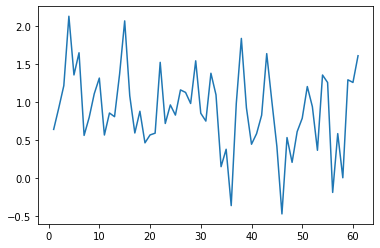

In [38]:
# Plot mean sentiment per chapter
plt.plot(sent_chap);

**Note**: In the book they don't use chapters, but sections of 80 lines of text.

> *an index here to keep track of where we are in the narrative; this index(using integer division) counts up sections of 80 lines of text.*

In [40]:
# Recreate plot from book 
lines_austin = re.split("\n", text, flags=re.I)#[::80] # split book in sections of 80 lines

In [44]:
chunks_80 = []

for i, text in enumerate(lines_austin):
  if (i%80==0) & (i!=0):
    chunks_80.append(" ".join(lines_austin[i-80:i]))


In [45]:
# Calculate mean sentiment value per chapter
sent_80lines = []

for text in chunks_80:

  # create frequency matrix
  matrix = tf(text)

  #merge with affin dictonary
  sent_aff = pd.merge(matrix, affin, left_on="word", right_on="word")

  #calculate sentiment value based on no of occurences
  sent_aff["total_sentiment"] = sent_aff["frequency"]*sent_aff["value"]
  sent_80lines.append(sent_aff.total_sentiment.mean())

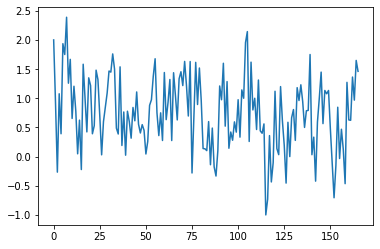

In [46]:
# Plot mean sentiment per 80 lines
plt.plot(sent_80lines);

### Sentiment for all Jane Austen books

In [47]:
# download collection of all jane austen books
all = strip_headers(load_etext(31100)).strip()
all_list = re.split('(?m)^(PERSUASION|NORTHANGER ABBEY|MANSFIELD PARK|EMMA|LADY SUSAN|LOVE AND FREINDSHIP AND OTHER EARLY WORKS|PRIDE AND PREJUDICE|SENSE AND SENSIBILITY)\n', all, flags=re.I)[1:]

# divide all books 
persuasion = all_list[1]
northanger = all_list[3]
mansfield = all_list[5]
emma = all_list[7]
susan = all_list[9]
pride = strip_headers(load_etext(42671)).strip()

In [74]:
def sent_p_chapter(text, susan=False):

  #Split book by chapter
  if susan==True: 
    chapter = re.split("(?m)^(?=[MDCLXVI])M*D?C{0,4}L?X{0,4}V?I{0,4}\n$", text) #in susan the chapters are named in roman numbers
  else:
    chapter = re.split("Chapter\s*", text, flags=re.I)

  # Calculate mean sentiment value per chapter
  sent_chap = []

  for text in chapter:

    # create frequency matrix
    matrix = tf(text)

    #merge with affin dictonary
    sent_aff = pd.merge(matrix, affin, left_on="word", right_on="word")

    #calculate sentiment value based on no of occurences
    sent_aff["total_sentiment"] = sent_aff["frequency"]*sent_aff["value"]
    sent_chap.append(sent_aff.total_sentiment.mean())

  return sent_chap

In [75]:
# Calculate sentiment 
persuasion_chap = sent_p_chapter(persuasion)
northanger_chap = sent_p_chapter(northanger)
mansfield_chap = sent_p_chapter(mansfield)
emma_chap = sent_p_chapter(emma)
susan_chap = sent_p_chapter(susan, susan=True)
pride_chap = sent_p_chapter(pride)

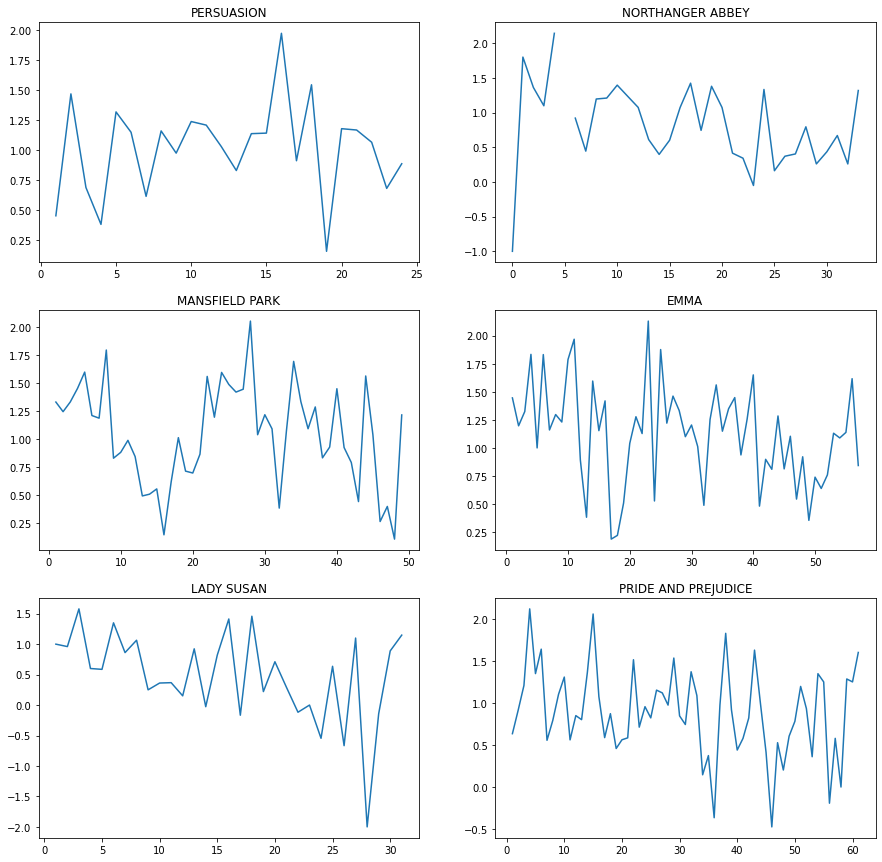

In [76]:
# Plot mean sentiment per chapter for all books
fig, axs = plt.subplots(3,2, figsize=[15,15])

axs[0,0].set_title("PERSUASION")
axs[0,0].plot(persuasion_chap)

axs[0,1].set_title("NORTHANGER ABBEY")
axs[0,1].plot(northanger_chap)

axs[1,0].set_title("MANSFIELD PARK")
axs[1,0].plot(mansfield_chap)

axs[1,1].set_title("EMMA")
axs[1,1].plot(emma_chap)

axs[2,0].set_title("LADY SUSAN")
axs[2,0].plot(susan_chap)

axs[2,1].set_title("PRIDE AND PREJUDICE")
axs[2,1].plot(pride_chap);